In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")

In [ ]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


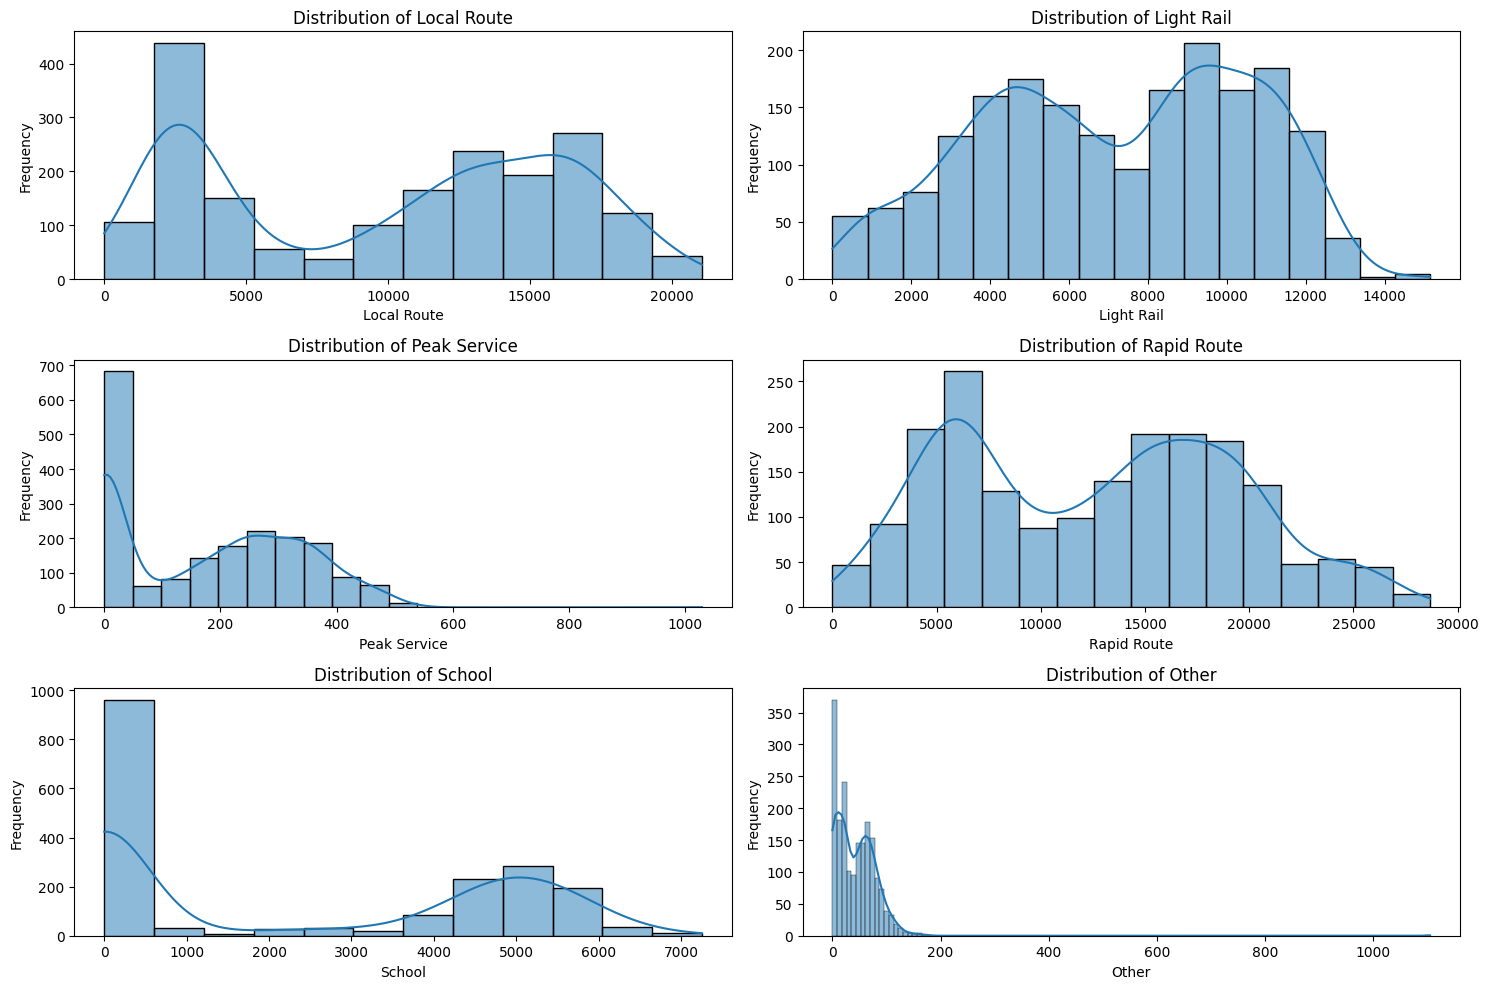

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + len(numerical_cols) % 2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB


In [ ]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year
0,2024-08-30,16436,10705,225,19026,3925,59.0,2024
1,2023-09-15,15499,10671,267,18421,4519,61.0,2023
2,2021-12-28,1756,2352,0,3775,0,13.0,2021
3,2023-01-11,10536,8347,223,14072,0,48.0,2023
4,2021-09-11,820,612,0,1283,0,11.0,2021


In [ ]:
numerical_cols_to_sum = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Year' in numerical_cols_to_sum:
    numerical_cols_to_sum.remove('Year')

df_yearly_sum = df.groupby('Year')[numerical_cols_to_sum].sum().reset_index()
print(df_yearly_sum.head())

   Year  Local Route  Light Rail  Peak Service  Rapid Route  School    Other
0  2019      2417860     1782046         52845      3397061  531950   1017.0
1  2020      2994326     2007162         52232      3755090  819218   7741.0
2  2021      3010241     1976253         50270      3511858  742226  16561.0
3  2022      3337746     2469844         50223      4141963  813800  19259.0
4  2023      4027317     3192432         78806      5330372  895655  21587.0


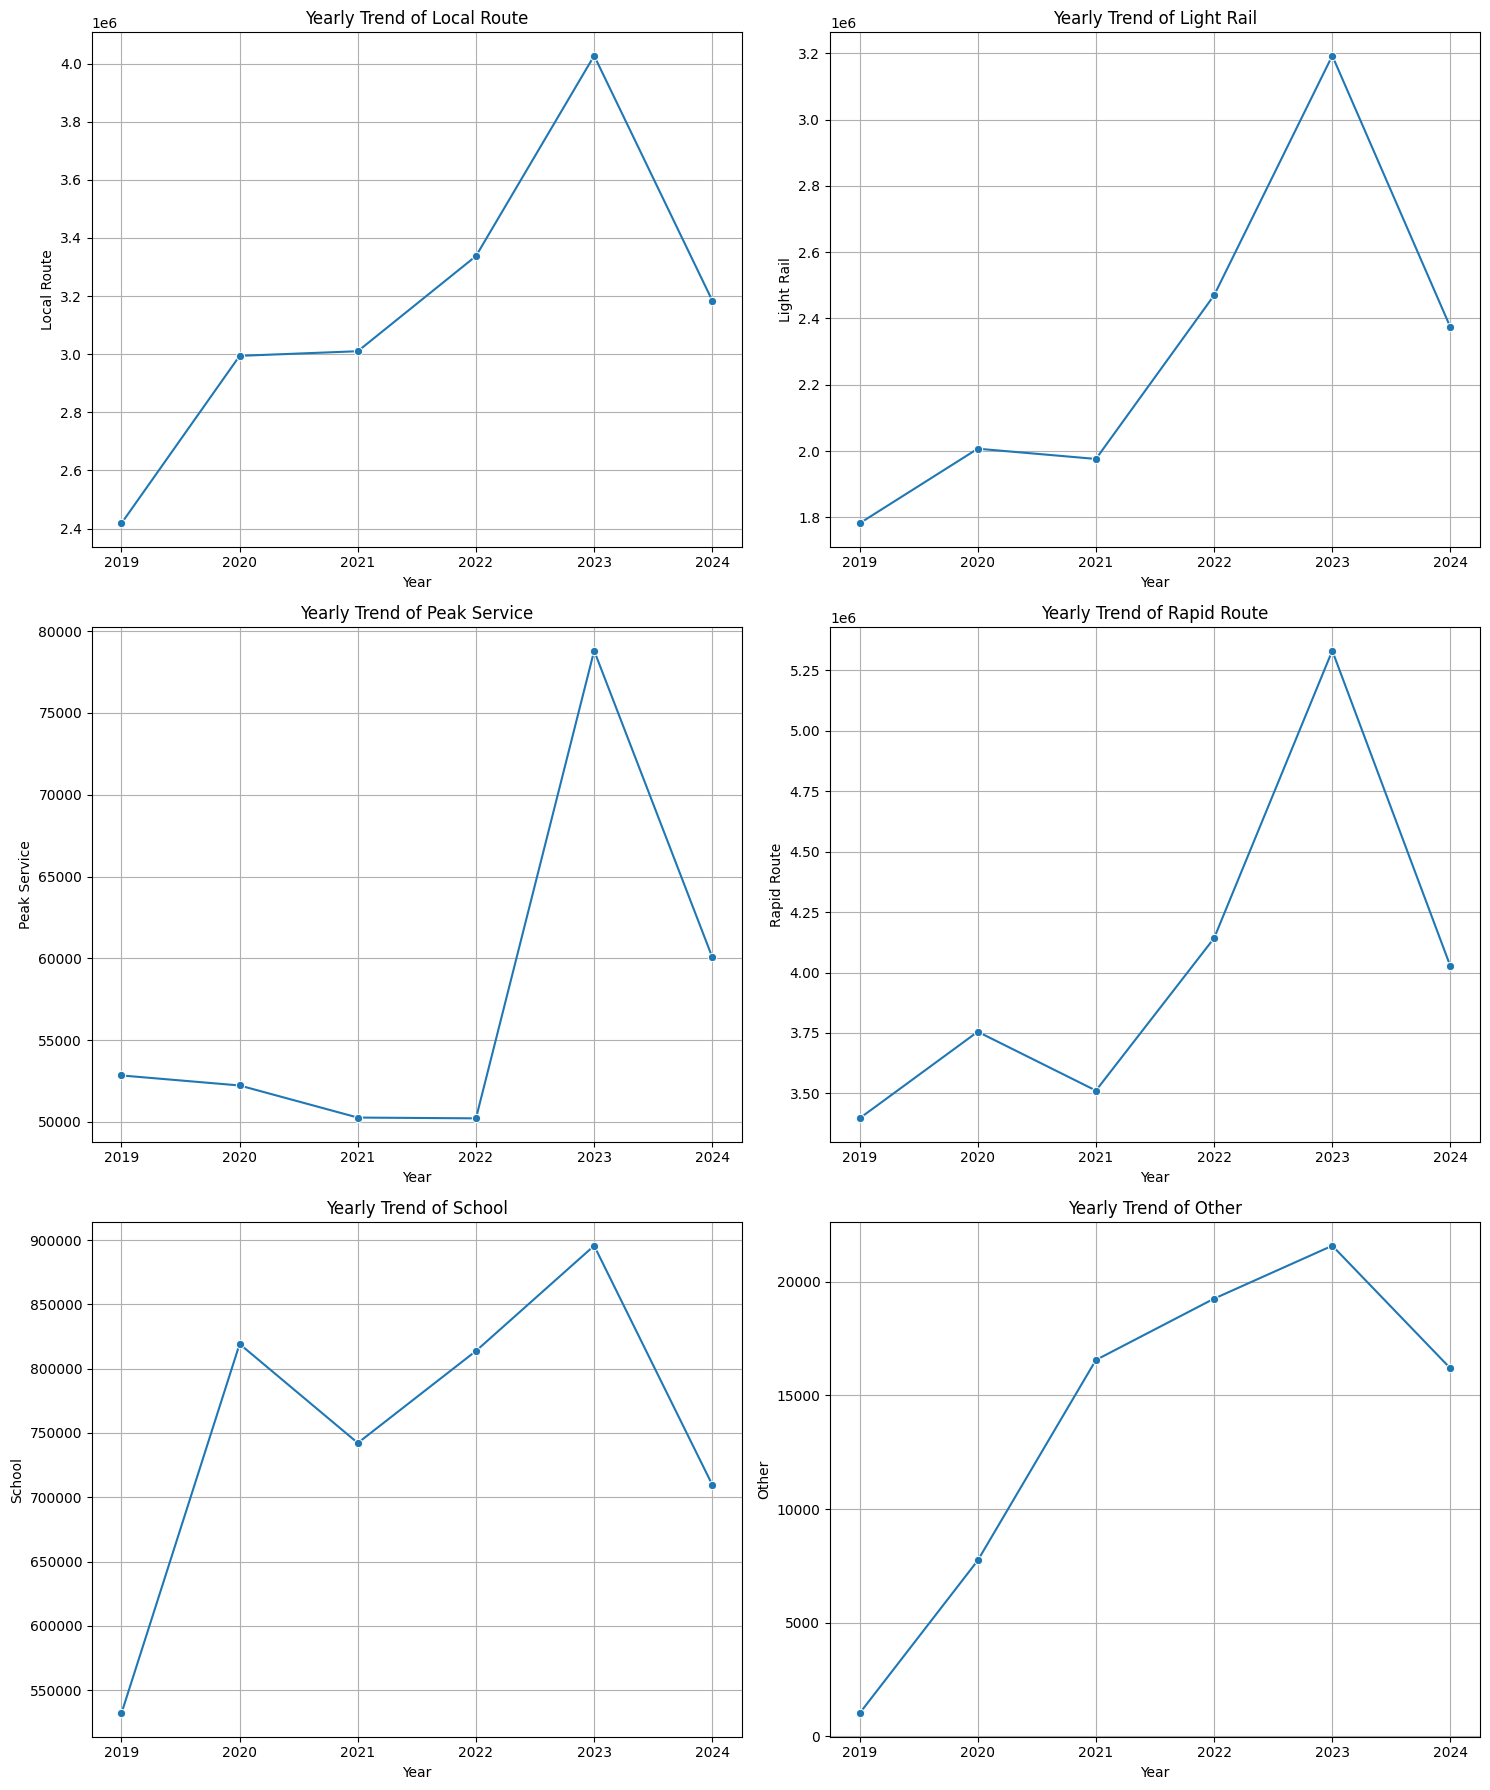

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_plot = df_yearly_sum.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Year' in numerical_cols_to_plot:
    numerical_cols_to_plot.remove('Year')

# Determine the number of rows and columns for subplots
num_cols = len(numerical_cols_to_plot)
num_rows = (num_cols + 1) // 2  # Adjust for better layout, e.g., 2 plots per row

plt.figure(figsize=(15, 6 * num_rows))

for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(num_rows, 2, i + 1)
    sns.lineplot(x='Year', y=col, data=df_yearly_sum, marker='o')
    plt.title(f'Yearly Trend of {col}')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(df_yearly_sum['Year'].astype(int))

plt.tight_layout()
plt.show()

In [ ]:
df_long = pd.melt(df_yearly_sum, id_vars=['Year'], var_name='Route Type', value_name='Value')
print(df_long.tail())

    Year Route Type    Value
31  2020      Other   7741.0
32  2021      Other  16561.0
33  2022      Other  19259.0
34  2023      Other  21587.0
35  2024      Other  16190.0


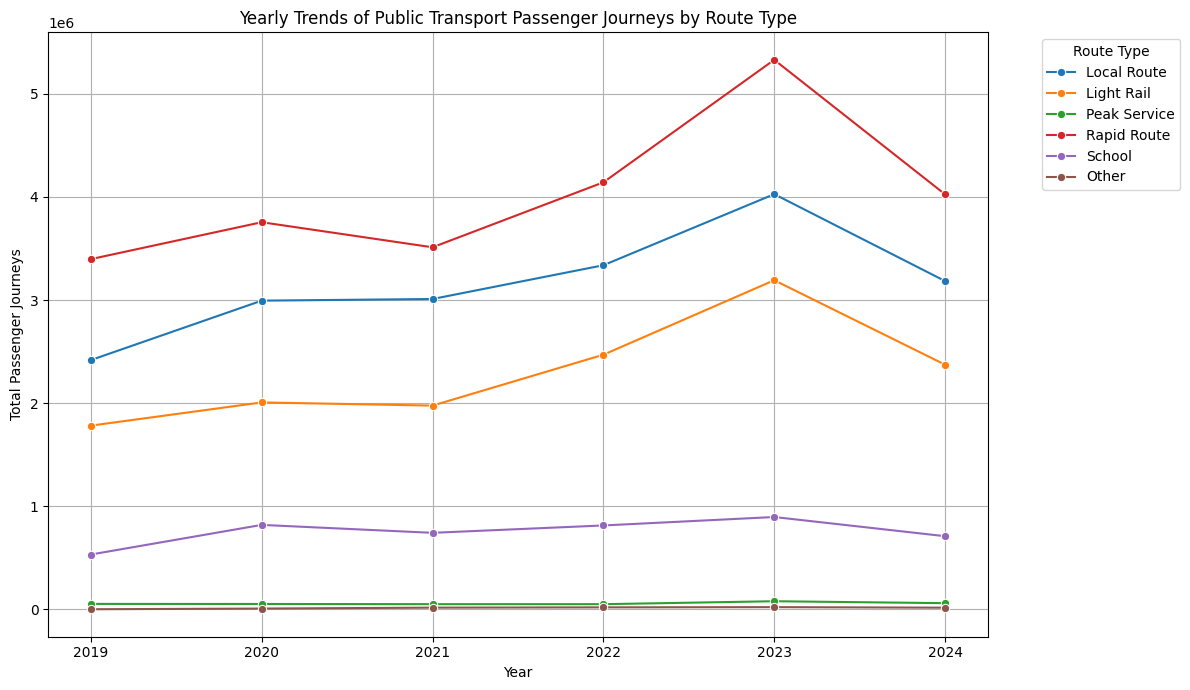

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Value', hue='Route Type', data=df_long, marker='o')
plt.title('Yearly Trends of Public Transport Passenger Journeys by Route Type')
plt.xlabel('Year')
plt.ylabel('Total Passenger Journeys')
plt.grid(True)
plt.xticks(df_yearly_sum['Year'].astype(int))
plt.legend(title='Route Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##INSIGHT:
people travel darastically increase from 2022 to 2023 with a 25.05% increase compared to the previous year 2021 to 2022 wich aready had a growth of 16.39% later in 2025 to 2023 to 2024 there was and drastic reduce in transportation in general of 23% which lead it back closer to Mean.

In [ ]:
df_yearly_sum['Total_Journeys'] = df_yearly_sum[numerical_cols_to_sum].sum(axis=1)

def calculate_percentage_growth(df, start_year, end_year):
    start_value = df[df['Year'] == start_year]['Total_Journeys'].iloc[0]
    end_value = df[df['Year'] == end_year]['Total_Journeys'].iloc[0]
    growth = ((end_value - start_value) / start_value) * 100
    return growth

# Generate all consecutive year intervals (re-using if available, otherwise defining)
years_in_data = sorted(df_yearly_sum['Year'].unique())
year_ranges = []
for i in range(len(years_in_data) - 1):
    year_ranges.append((years_in_data[i], years_in_data[i+1]))

print("--- Total Journeys ---")
for start_yr, end_yr in year_ranges:
    growth = calculate_percentage_growth(df_yearly_sum, start_yr, end_yr)
    print(f"Growth from {start_yr} to {end_yr}: {growth:.2f}%")

--- Total Journeys ---
Growth from 2019 to 2020: 17.76%
Growth from 2020 to 2021: -3.41%
Growth from 2021 to 2022: 16.39%
Growth from 2022 to 2023: 25.05%
Growth from 2023 to 2024: -23.46%


In [ ]:
def calculate_percentage_growth_by_mode(df, start_year, end_year, mode_of_transport):
    # Ensure the years are present in the DataFrame
    if start_year not in df['Year'].values or end_year not in df['Year'].values:
        return "N/A - Year not found"

    start_value = df[df['Year'] == start_year][mode_of_transport].iloc[0]
    end_value = df[df['Year'] == end_year][mode_of_transport].iloc[0]

    if start_value == 0:  # Handle cases where the starting value is zero
        if end_value > 0:
            return float('inf') # Indicates growth from zero
        else:
            return 0.0 # No change if both are zero

    growth = ((end_value - start_value) / start_value) * 100
    return growth

# Generate all consecutive year intervals
years_in_data = sorted(df_yearly_sum['Year'].unique())
year_ranges = []
for i in range(len(years_in_data) - 1):
    year_ranges.append((years_in_data[i], years_in_data[i+1]))

print("Percentage Change in Travel by Mode of Transport:\n")

for mode in numerical_cols_to_sum:
    print(f"--- {mode} ---")
    for start_yr, end_yr in year_ranges:
        growth = calculate_percentage_growth_by_mode(df_yearly_sum, start_yr, end_yr, mode)
        if isinstance(growth, str):
            print(f"Growth from {start_yr} to {end_yr}: {growth}")
        elif growth == float('inf'):
            print(f"Growth from {start_yr} to {end_yr}: Infinite (started from 0 and increased)")
        else:
            print(f"Growth from {start_yr} to {end_yr}: {growth:.2f}%")
    print()

Percentage Change in Travel by Mode of Transport:

--- Local Route ---
Growth from 2019 to 2020: 23.84%
Growth from 2020 to 2021: 0.53%
Growth from 2021 to 2022: 10.88%
Growth from 2022 to 2023: 20.66%
Growth from 2023 to 2024: -20.93%

--- Light Rail ---
Growth from 2019 to 2020: 12.63%
Growth from 2020 to 2021: -1.54%
Growth from 2021 to 2022: 24.98%
Growth from 2022 to 2023: 29.26%
Growth from 2023 to 2024: -25.66%

--- Peak Service ---
Growth from 2019 to 2020: -1.16%
Growth from 2020 to 2021: -3.76%
Growth from 2021 to 2022: -0.09%
Growth from 2022 to 2023: 56.91%
Growth from 2023 to 2024: -23.79%

--- Rapid Route ---
Growth from 2019 to 2020: 10.54%
Growth from 2020 to 2021: -6.48%
Growth from 2021 to 2022: 17.94%
Growth from 2022 to 2023: 28.69%
Growth from 2023 to 2024: -24.49%

--- School ---
Growth from 2019 to 2020: 54.00%
Growth from 2020 to 2021: -9.40%
Growth from 2021 to 2022: 9.64%
Growth from 2022 to 2023: 10.06%
Growth from 2023 to 2024: -20.77%

--- Other ---
Growth 

In [ ]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year,Month
0,2024-08-30,16436,10705,225,19026,3925,59.0,2024,8
1,2023-09-15,15499,10671,267,18421,4519,61.0,2023,9
2,2021-12-28,1756,2352,0,3775,0,13.0,2021,12
3,2023-01-11,10536,8347,223,14072,0,48.0,2023,1
4,2021-09-11,820,612,0,1283,0,11.0,2021,9


In [ ]:
numerical_cols_to_sum = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Year' in numerical_cols_to_sum:
    numerical_cols_to_sum.remove('Year')
if 'Month' in numerical_cols_to_sum:
    numerical_cols_to_sum.remove('Month')

df_monthly_sum = df.groupby('Month')[numerical_cols_to_sum].sum().reset_index()
print(df_monthly_sum.head())

   Month  Local Route  Light Rail  Peak Service  Rapid Route  School   Other
0      1      1121890      934003         22185      1568806    7560  4936.0
1      2      1813470     1255338         31647      2225550  586507  7681.0
2      3      1808995     1258904         32588      2276888  538714  8428.0
3      4      1216099      946856         23163      1608636  194644  6334.0
4      5      1575968     1099021         28098      1904306  457855  8354.0


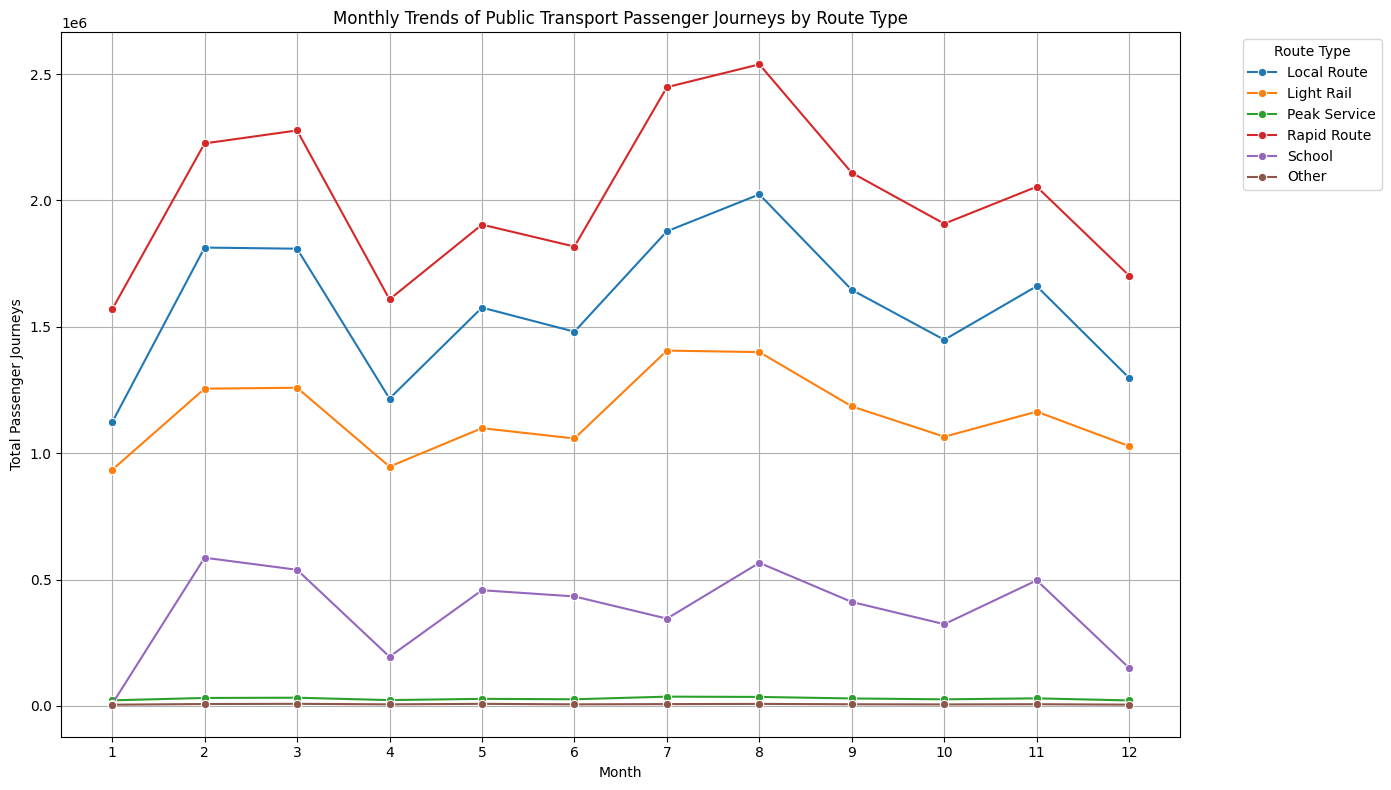

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify numerical columns to plot, excluding 'Month'
numerical_cols_to_plot = df_monthly_sum.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Month' in numerical_cols_to_plot:
    numerical_cols_to_plot.remove('Month')

# Reshape df_monthly_sum to a long format for combined plotting
df_monthly_long = pd.melt(df_monthly_sum, id_vars=['Month'], var_name='Route Type', value_name='Value')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Value', hue='Route Type', data=df_monthly_long, marker='o')
plt.title('Monthly Trends of Public Transport Passenger Journeys by Route Type')
plt.xlabel('Month')
plt.ylabel('Total Passenger Journeys')
plt.grid(True)
plt.xticks(range(1, 13)) # Display all 12 months clearly
plt.legend(title='Route Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Insight:
 we can see people prefer rapid routs folled by local routes and tend to avoid peak service.

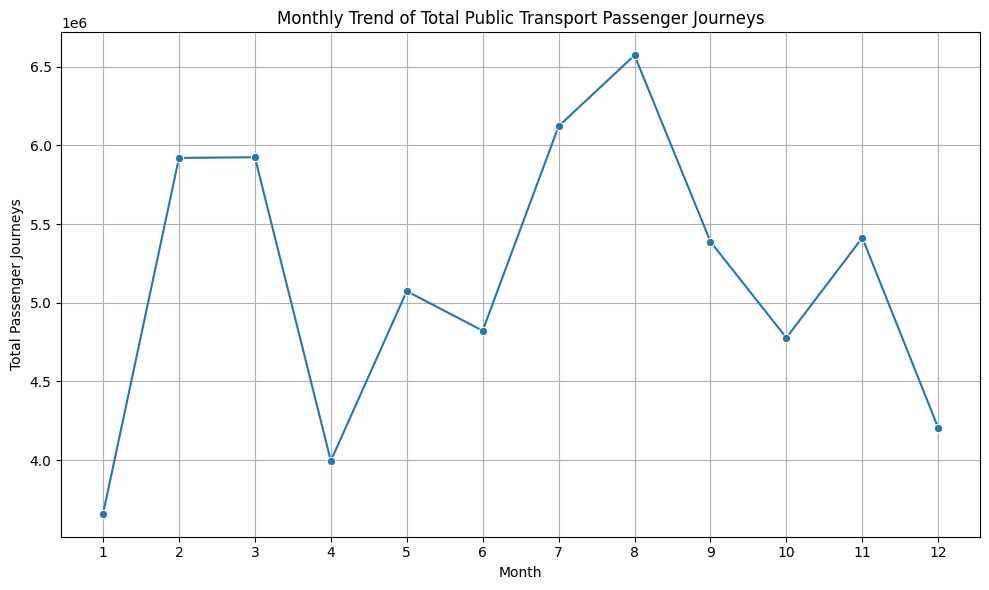


--- Month-over-Month Percentage Change in Total Journeys ---
 Month  Percentage_Change
     1                NaN
     2          61.781313
     3           0.073038
     4         -32.555987
     5          26.975533
     6          -4.951137
     7          26.937723
     8           7.365433
     9         -18.019718
    10         -11.330392
    11          13.307108
    12         -22.322544


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure numerical_cols_to_sum is defined (assuming it's available from previous steps)
# If not, define it based on df_monthly_sum
if 'numerical_cols_to_sum' not in locals():
    numerical_cols_to_sum = df_monthly_sum.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'Month' in numerical_cols_to_sum:
        numerical_cols_to_sum.remove('Month')

# 1. Calculate total monthly journeys
df_monthly_sum['Total_Journeys'] = df_monthly_sum[numerical_cols_to_sum].sum(axis=1)

# 2. Plot month-wise total travel
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total_Journeys', data=df_monthly_sum, marker='o')
plt.title('Monthly Trend of Total Public Transport Passenger Journeys')
plt.xlabel('Month')
plt.ylabel('Total Passenger Journeys')
plt.grid(True)
plt.xticks(range(1, 13)) # Display all 12 months clearly
plt.tight_layout()
plt.show()

# 3. Tabulate month-over-month percentage changes for total travel
def calculate_monthly_percentage_growth(df, month_col, value_col):
    df_sorted = df.sort_values(by=month_col).reset_index(drop=True)
    df_sorted['Previous_Month_Value'] = df_sorted[value_col].shift(1)
    df_sorted['Percentage_Change'] = ((df_sorted[value_col] - df_sorted['Previous_Month_Value']) / df_sorted['Previous_Month_Value']) * 100
    return df_sorted[['Month', 'Percentage_Change']]

monthly_changes = calculate_monthly_percentage_growth(df_monthly_sum, 'Month', 'Total_Journeys')

print("\n--- Month-over-Month Percentage Change in Total Journeys ---")
print(monthly_changes.to_string(index=False))

In [ ]:
numerical_cols_to_sum = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
df_monthly_yearly_sum = df.groupby(['Year', 'Month'])[numerical_cols_to_sum].sum().reset_index()
print(df_monthly_yearly_sum.head())

   Year  Month  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  2019      7       406607      292641          9520       555002   63773   
1  2019      8       456797      316416          9519       623134  119419   
2  2019      9       424399      305334          9204       584540  111689   
3  2019     10       407732      320310          9139       613572   79456   
4  2019     11       413213      301518          9081       580930  114722   

   Other  
0   46.0  
1   35.0  
2   24.0  
3  330.0  
4  569.0  


In [ ]:
df_monthly_yearly_sum['Total_Journeys'] = df_monthly_yearly_sum[numerical_cols_to_sum].sum(axis=1)
print(df_monthly_yearly_sum.head())

   Year  Month  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  2019      7       406607      292641          9520       555002   63773   
1  2019      8       456797      316416          9519       623134  119419   
2  2019      9       424399      305334          9204       584540  111689   
3  2019     10       407732      320310          9139       613572   79456   
4  2019     11       413213      301518          9081       580930  114722   

   Other  Total_Journeys  
0   46.0       1327589.0  
1   35.0       1525320.0  
2   24.0       1435190.0  
3  330.0       1430539.0  
4  569.0       1420033.0  


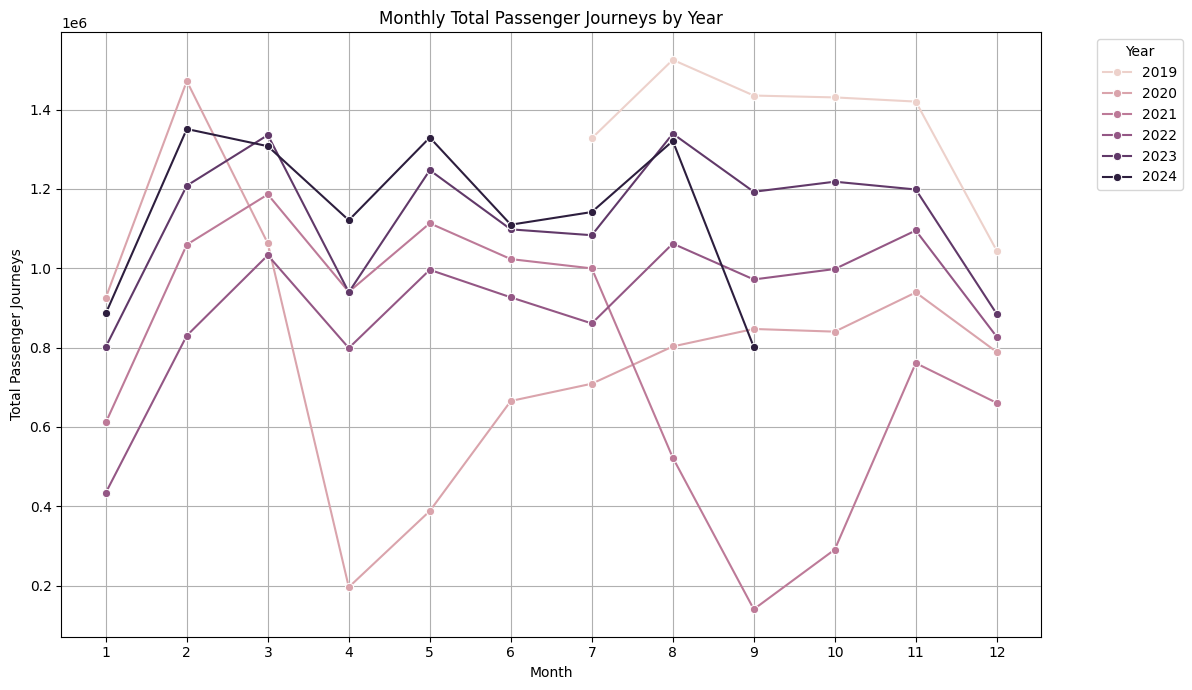

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_monthly_yearly_sum, x='Month', y='Total_Journeys', hue='Year', marker='o')
plt.title('Monthly Total Passenger Journeys by Year')
plt.xlabel('Month')
plt.ylabel('Total Passenger Journeys')
plt.xticks(range(1, 13)) # Ensure all 12 months are displayed
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import calendar

def get_month_name(month_number):
    """Returns the full month name for a given month number."""
    return calendar.month_name[month_number]

def calculate_monthly_percentage_change(df, year, start_month, end_month):
    """Calculates the percentage change in 'Total_Journeys' between two months for a given year."""
    start_value_row = df[(df['Year'] == year) & (df['Month'] == start_month)]
    end_value_row = df[(df['Year'] == year) & (df['Month'] == end_month)]

    if start_value_row.empty or end_value_row.empty:
        print(f"Data not found for {get_month_name(start_month)} or {get_month_name(end_month)} in {year}.")
        return None

    start_value = start_value_row['Total_Journeys'].iloc[0]
    end_value = end_value_row['Total_Journeys'].iloc[0]

    if start_value == 0:
        if end_value == 0:
            return 0.0
        else:
            return float('inf') # Infinite growth from zero

    percentage_change = ((end_value - start_value) / start_value) * 100
    return percentage_change

# Calculate the percentage change from March to April 2020
change_2020_mar_apr = calculate_monthly_percentage_change(df_monthly_yearly_sum, 2020, 3, 4)

if change_2020_mar_apr is not None:
    print(f"Percentage change from {get_month_name(3)} to {get_month_name(4)} in 2020: {change_2020_mar_apr:.2f}%")


Percentage change from March to April in 2020: -81.55%


In [ ]:
change_2021_jul_aug = calculate_monthly_percentage_change(df_monthly_yearly_sum, 2021, 7, 8)

if change_2021_jul_aug is not None:
    if change_2021_jul_aug < 0:
        print(f"Percentage change from {get_month_name(7)} to {get_month_name(8)} in 2021: {change_2021_jul_aug:.2f}% (Decrease)")
    else:
        print(f"Percentage change from {get_month_name(7)} to {get_month_name(8)} in 2021: {change_2021_jul_aug:.2f}% (Increase)")

Percentage change from July to August in 2021: -47.73% (Decrease)


In [ ]:
change_2021_aug_sep = calculate_monthly_percentage_change(df_monthly_yearly_sum, 2021, 8, 9)

if change_2021_aug_sep is not None:
    if change_2021_aug_sep < 0:
        print(f"Percentage change from {get_month_name(8)} to {get_month_name(9)} in 2021: {change_2021_aug_sep:.2f}% (Decrease)")
    else:
        print(f"Percentage change from {get_month_name(8)} to {get_month_name(9)} in 2021: {change_2021_aug_sep:.2f}% (Increase)")

Percentage change from August to September in 2021: -73.15% (Decrease)


##INSIGHT:
observation:
see a decrease of 81.55% in transport from 2020 march to april then a another decrease of 47.73% in 2021 july to augest followed by an another drastic downwasd trend of 73.15% on 2021 augest to september.

Inference : the 2020 decrease is due to the spread of covid 19 pandamic and because of imediatelockdown restrictions. The 2021 decrease is due to the second way lockdown that was caused by the reopening of colleges, schools and work stations.


In [ ]:
def calculate_monthly_percentage_growth(df, month_col, value_col):
    df_sorted = df.sort_values(by=month_col).reset_index(drop=True)
    df_sorted['Previous_Month_Value'] = df_sorted[value_col].shift(1)
    df_sorted['Percentage_Change'] = ((df_sorted[value_col] - df_sorted['Previous_Month_Value']) / df_sorted['Previous_Month_Value']) * 100
    return df_sorted[['Month', 'Percentage_Change']]

print("Month-over-Month Percentage Change for Each Route Type:\n")

for mode in numerical_cols_to_sum:
    print(f"--- {mode} ---")
    # Calculate monthly sums for the specific mode
    mode_monthly_sum = df.groupby('Month')[mode].sum().reset_index()
    monthly_changes_mode = calculate_monthly_percentage_growth(mode_monthly_sum, 'Month', mode)
    print(monthly_changes_mode.to_string(index=False))
    print()

Month-over-Month Percentage Change for Each Route Type:

--- Local Route ---
 Month  Percentage_Change
     1                NaN
     2          61.644190
     3          -0.246764
     4         -32.774883
     5          29.592081
     6          -6.048410
     7          26.828407
     8           7.776265
     9         -18.673706
    10         -11.986542
    11          14.635571
    12         -21.870744

--- Light Rail ---
 Month  Percentage_Change
     1                NaN
     2          34.404065
     3           0.284067
     4         -24.787275
     5          16.070553
     6          -3.718946
     7          32.863330
     8          -0.424286
     9         -15.343157
    10         -10.116746
    11           9.316612
    12         -11.726855

--- Peak Service ---
 Month  Percentage_Change
     1                NaN
     2          42.650439
     3           2.973426
     4         -28.921689
     5          21.305530
     6          -5.932807
     7          39.2190

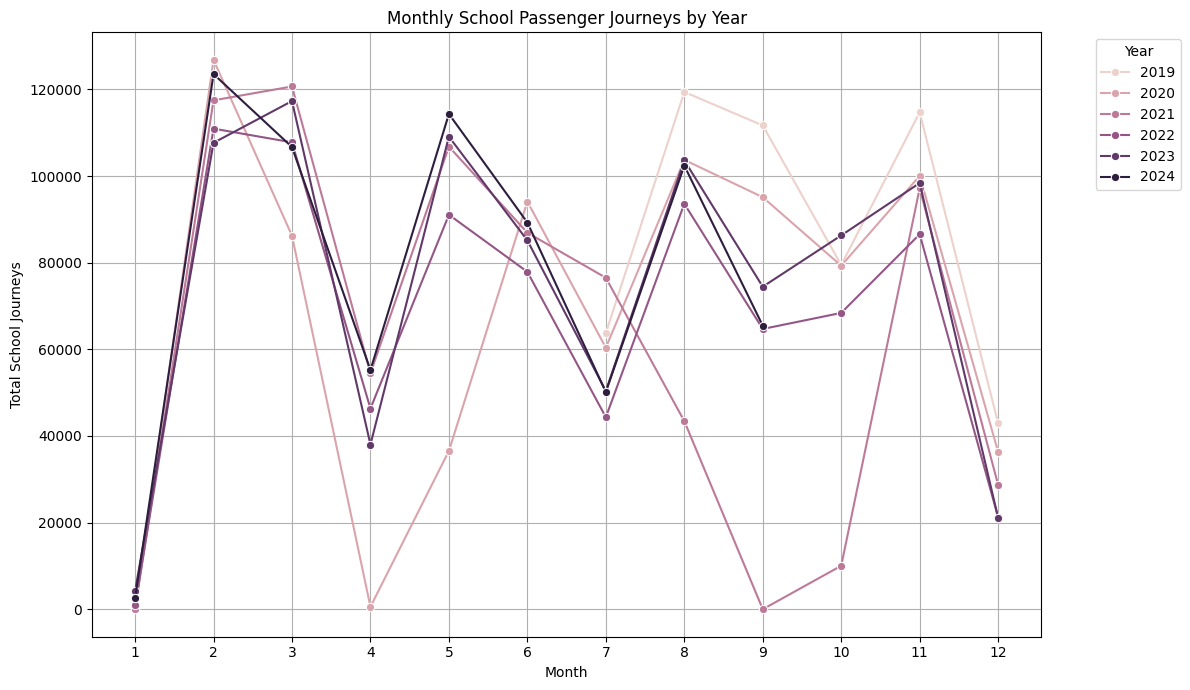

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_monthly_yearly_sum, x='Month', y='School', hue='Year', marker='o')
plt.title('Monthly School Passenger Journeys by Year')
plt.xlabel('Month')
plt.ylabel('Total School Journeys')
plt.xticks(range(1, 13)) # Ensure all 12 months are displayed
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Insight :

we see a clear trend in increased use of school route on the month of May which maybe due to exam season.

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Year,Month,DayOfWeek
0,2024-08-30,16436,10705,225,19026,3925,59.0,2024,8,Friday
1,2023-09-15,15499,10671,267,18421,4519,61.0,2023,9,Friday
2,2021-12-28,1756,2352,0,3775,0,13.0,2021,12,Tuesday
3,2023-01-11,10536,8347,223,14072,0,48.0,2023,1,Wednesday
4,2021-09-11,820,612,0,1283,0,11.0,2021,9,Saturday


In [ ]:
numerical_cols_to_sum = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Year' in numerical_cols_to_sum:
    numerical_cols_to_sum.remove('Year')
if 'Month' in numerical_cols_to_sum:
    numerical_cols_to_sum.remove('Month')

# Define the order of the days of the week for consistent plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_daily_sum = df.groupby('DayOfWeek')[numerical_cols_to_sum].sum().reindex(day_order).reset_index()
print(df_daily_sum.head(7))

   DayOfWeek  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0     Monday      3135842     2066385         64576      3797318  825936   
1    Tuesday      3628602     2354131         77194      4370228  946472   
2  Wednesday      3665716     2361978         77199      4382807  960163   
3   Thursday      3607678     2333170         69886      4312767  923370   
4     Friday      3436989     2331803         55582      4094151  856468   
5   Saturday       896297     1370268             0      1819562      40   
6     Sunday       600572      983131             0      1384622      20   

     Other  
0  12129.0  
1  14197.0  
2  15268.0  
3  15845.0  
4  14908.0  
5   5154.0  
6   4854.0  


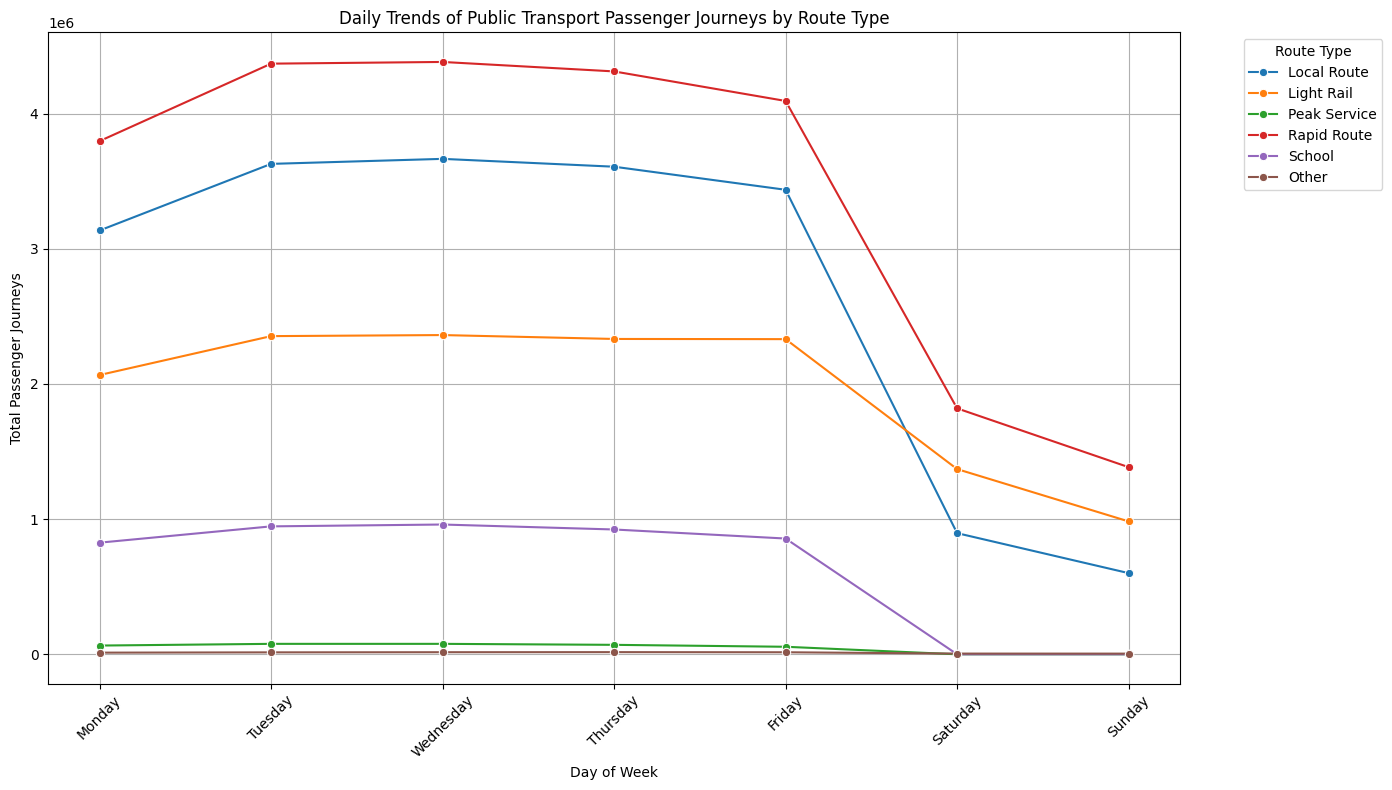

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify numerical columns to plot, excluding 'DayOfWeek'
numerical_cols_to_plot = df_daily_sum.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Reshape df_daily_sum to a long format for combined plotting
df_daily_long = pd.melt(df_daily_sum, id_vars=['DayOfWeek'], var_name='Route Type', value_name='Value')

plt.figure(figsize=(14, 8))
sns.lineplot(x='DayOfWeek', y='Value', hue='Route Type', data=df_daily_long, marker='o', sort=False)
plt.title('Daily Trends of Public Transport Passenger Journeys by Route Type')
plt.xlabel('Day of Week')
plt.ylabel('Total Passenger Journeys')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend(title='Route Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##INSIGHT:
 we can see people prefer rapid routs folled by local routes and tend to avoid peak service.

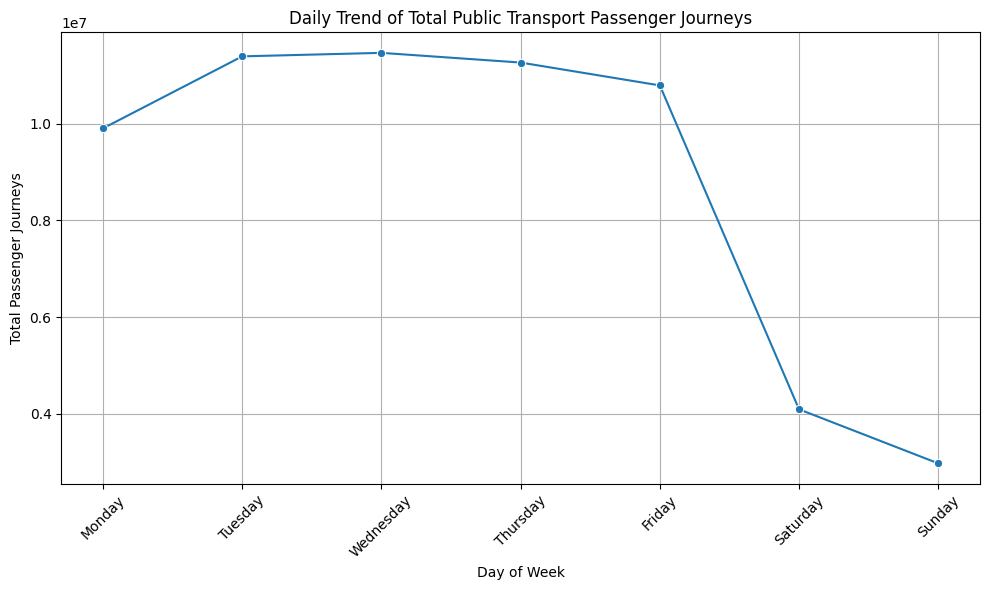


--- Day-wise Deviation from Average Total Journeys ---
DayOfWeek  Total_Journeys  Deviation_from_Average Formatted_Percentage_Deviation
   Monday       9902186.0            1.063146e+06                         12.03%
  Tuesday      11390824.0            2.551784e+06                         28.87%
Wednesday      11463131.0            2.624091e+06                         29.69%
 Thursday      11262716.0            2.423676e+06                         27.42%
   Friday      10789901.0            1.950861e+06                         22.07%
 Saturday       4091321.0           -4.747719e+06                        -53.71%
   Sunday       2973199.0           -5.865841e+06                        -66.36%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the columns that represent the individual public transport journey types.
# These columns are consistent and do not change across runs.
journey_type_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# Create a fresh copy of df_daily_sum to work with, to ensure reproducibility.
# This prevents previous runs from cumulatively altering the DataFrame for the current run.
df_daily_sum_cleaned = df_daily_sum.copy()

# Remove any calculated columns that might have been added in previous runs to ensure idempotency.
columns_to_drop_if_exist = [
    'Total_Journeys',
    'Deviation_from_Average',
    'Percentage_Deviation_from_Average',
    'Formatted_Percentage_Deviation'
]
for col in columns_to_drop_if_exist:
    if col in df_daily_sum_cleaned.columns:
        df_daily_sum_cleaned = df_daily_sum_cleaned.drop(columns=[col])

# 1. Calculate total daily journeys using only the original journey type columns
df_daily_sum_cleaned['Total_Journeys'] = df_daily_sum_cleaned[journey_type_columns].sum(axis=1)

# 2. Plot day-wise total travel
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayOfWeek', y='Total_Journeys', data=df_daily_sum_cleaned, marker='o', sort=False)
plt.title('Daily Trend of Total Public Transport Passenger Journeys')
plt.xlabel('Day of Week')
plt.ylabel('Total Passenger Journeys')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 3. Calculate average daily travel
average_daily_journeys = df_daily_sum_cleaned['Total_Journeys'].mean()

# 4. Calculate deviation from average
df_daily_sum_cleaned['Deviation_from_Average'] = df_daily_sum_cleaned['Total_Journeys'] - average_daily_journeys
df_daily_sum_cleaned['Percentage_Deviation_from_Average'] = (df_daily_sum_cleaned['Deviation_from_Average'] / average_daily_journeys) * 100

# 5. Tabulate deviations
print("\n--- Day-wise Deviation from Average Total Journeys ---")
# Format the percentage column for display
df_daily_sum_cleaned['Formatted_Percentage_Deviation'] = df_daily_sum_cleaned['Percentage_Deviation_from_Average'].map('{:.2f}%'.format)
print(df_daily_sum_cleaned[['DayOfWeek', 'Total_Journeys', 'Deviation_from_Average', 'Formatted_Percentage_Deviation']].to_string(index=False))


##Insight :
 we can observe the travell is highest on weekdays from tuesday till wednesday with an travel range of 27% to 29 % above average . weekends tend to have lowest travel ranges of 53% to 67% below average .

In [ ]:
numerical_journey_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
df_daily_total = df.groupby('Date')[numerical_journey_cols].sum()
print(df_daily_total.head())

            Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
2019-07-01        15987        9962           407        21223    3715    0.0
2019-07-02        16895       10656           409        21715    3993    0.0
2019-07-03        16613       10658           427        22025    3638    0.0
2019-07-04        16604       10445           437        21868    3576    0.0
2019-07-05        16040       10532           400        20697    2856    0.0


In [ ]:
numerical_journey_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
df_daily_total['Total_Journeys'] = df_daily_total[numerical_journey_cols].sum(axis=1)

df_daily_total = df_daily_total.reset_index()
df_daily_total = df_daily_total.rename(columns={'Date': 'ds', 'Total_Journeys': 'y'})

print(df_daily_total.head())

          ds  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0 2019-07-01        15987        9962           407        21223    3715   
1 2019-07-02        16895       10656           409        21715    3993   
2 2019-07-03        16613       10658           427        22025    3638   
3 2019-07-04        16604       10445           437        21868    3576   
4 2019-07-05        16040       10532           400        20697    2856   

   Other        y  
0    0.0  51294.0  
1    0.0  53668.0  
2    0.0  53361.0  
3    0.0  52930.0  
4    0.0  50525.0  


In [ ]:
dfs_for_prophet = {}
numerical_journey_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

for col in numerical_journey_cols:
    temp_df = df[['Date', col]].copy()
    temp_df.rename(columns={'Date': 'ds', col: 'y'}, inplace=True)
    dfs_for_prophet[col] = temp_df

print("Prepared data for 'Local Route':")
print(dfs_for_prophet['Local Route'].head())

Prepared data for 'Local Route':
          ds      y
0 2024-08-30  16436
1 2023-09-15  15499
2 2021-12-28   1756
3 2023-01-11  10536
4 2021-09-11    820


In [ ]:
from prophet import Prophet

models = {}
forecasts = {}

numerical_journey_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

for route_type in numerical_journey_cols:
    print(f"\n--- Training and Forecasting for {route_type} ---")
    df_prophet = dfs_for_prophet[route_type]

    # Instantiate Prophet model
    model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

    # Fit the model to the data
    model.fit(df_prophet)

    # Create a future DataFrame for the next 7 days
    future = model.make_future_dataframe(periods=7, freq='D')

    # Generate predictions
    forecast = model.predict(future)

    # Store model and forecast
    models[route_type] = model
    forecasts[route_type] = forecast

    # Display the tail of the forecast
    print(f"Forecast for {route_type}:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7).to_string(index=False))



--- Training and Forecasting for Local Route ---
Forecast for Local Route:
        ds         yhat   yhat_lower   yhat_upper
2024-09-30 10605.076826  6862.053526 14837.315243
2024-10-01 12400.978695  8693.860996 16601.956665
2024-10-02 12566.123700  8577.264020 16683.568358
2024-10-03 12416.430193  8462.626433 16560.923573
2024-10-04 11887.680495  7926.911428 15939.760343
2024-10-05  2740.383506 -1457.527221  6407.420428
2024-10-06  1816.001232 -2120.966984  6117.990722

--- Training and Forecasting for Light Rail ---
Forecast for Light Rail:
        ds        yhat  yhat_lower   yhat_upper
2024-09-30 7590.645026 5209.739331  9919.165312
2024-10-01 8644.524495 6349.858417 10988.402679
2024-10-02 8687.110324 6246.582311 10987.831152
2024-10-03 8606.398773 6579.509171 10873.714005
2024-10-04 8636.376969 6438.693871 10946.699921
2024-10-05 5172.361434 2948.393883  7529.892586
2024-10-06 3814.683417 1369.082106  6121.891051

--- Training and Forecasting for Peak Service ---
Forecast for Pe

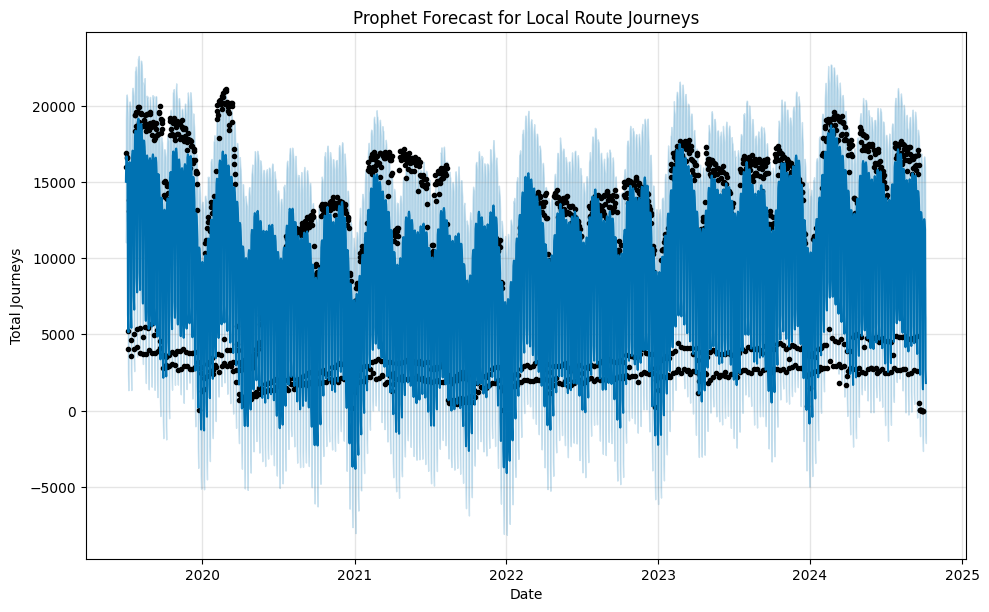

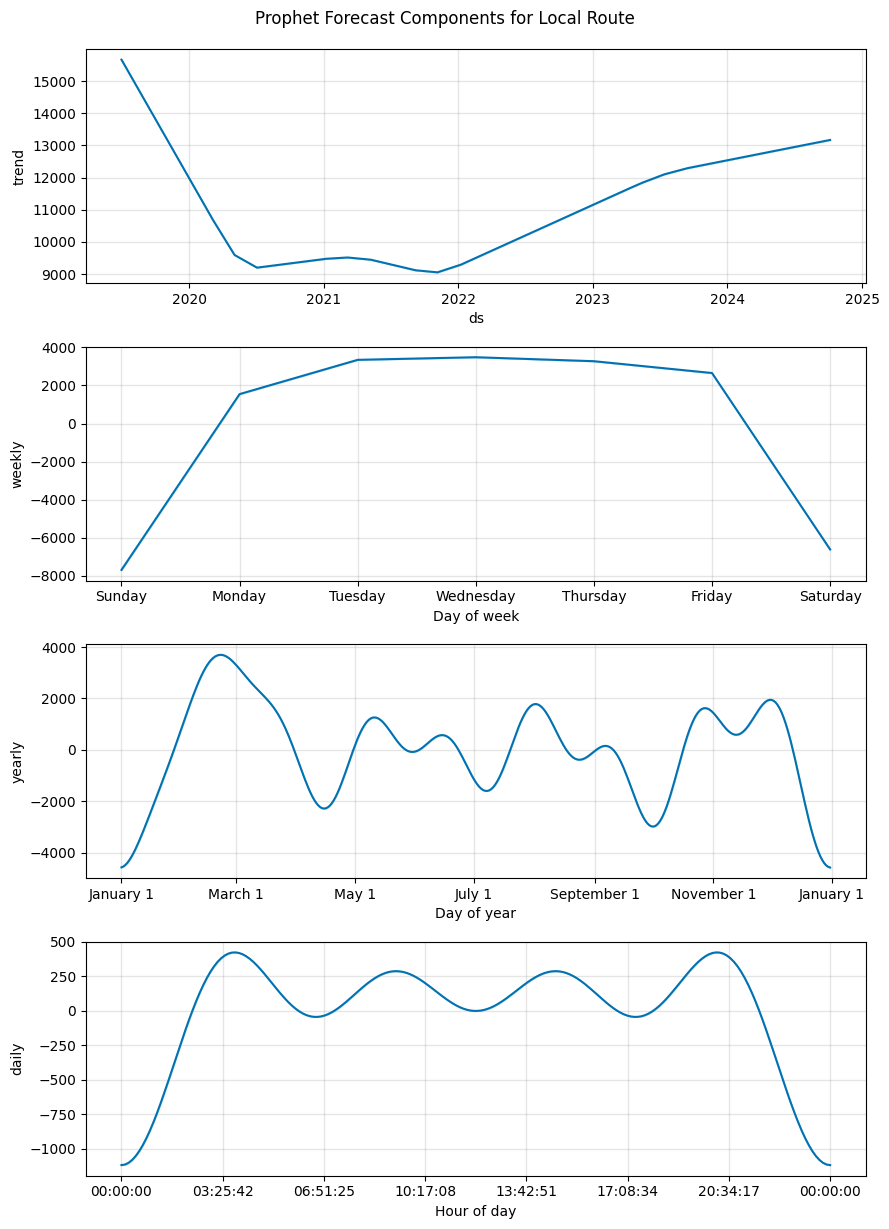

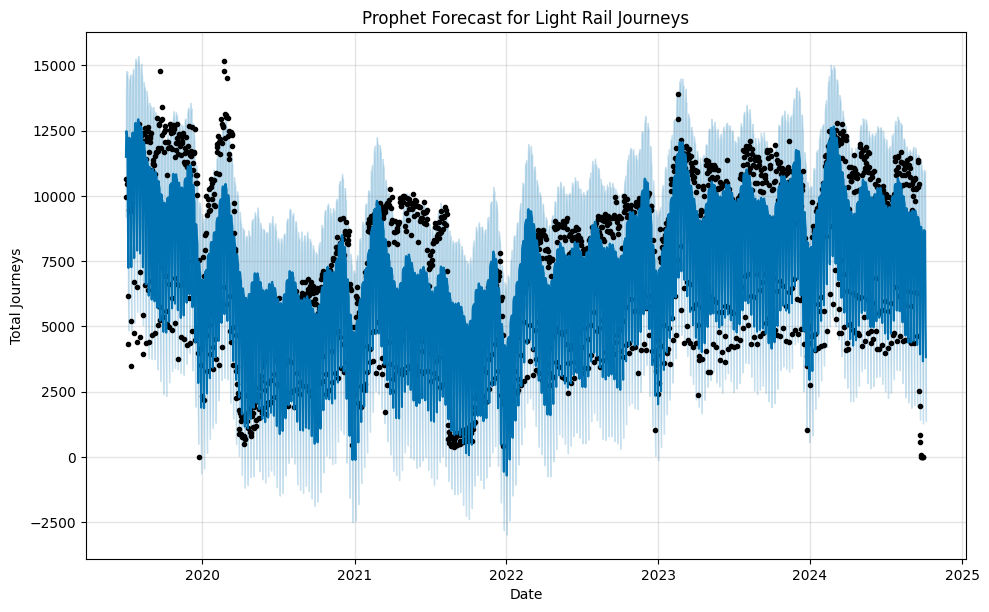

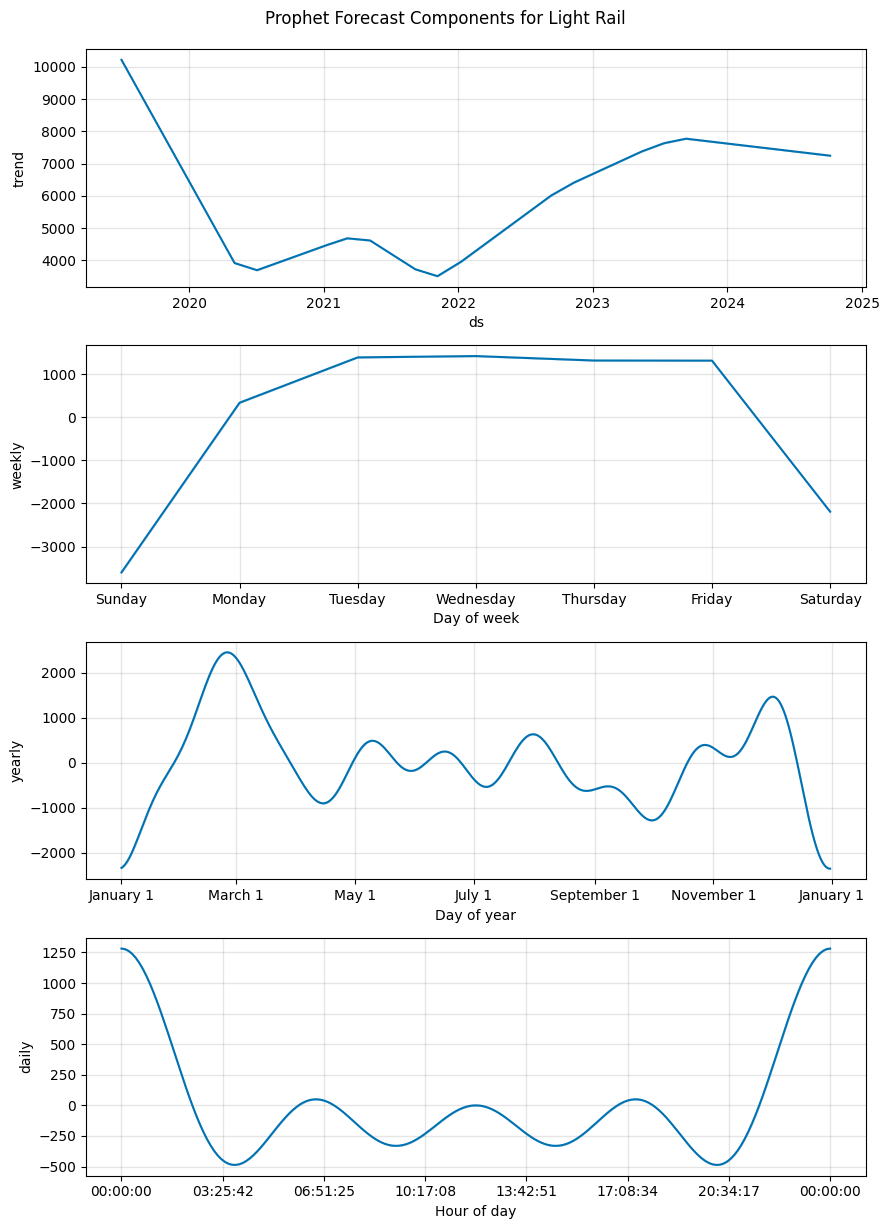

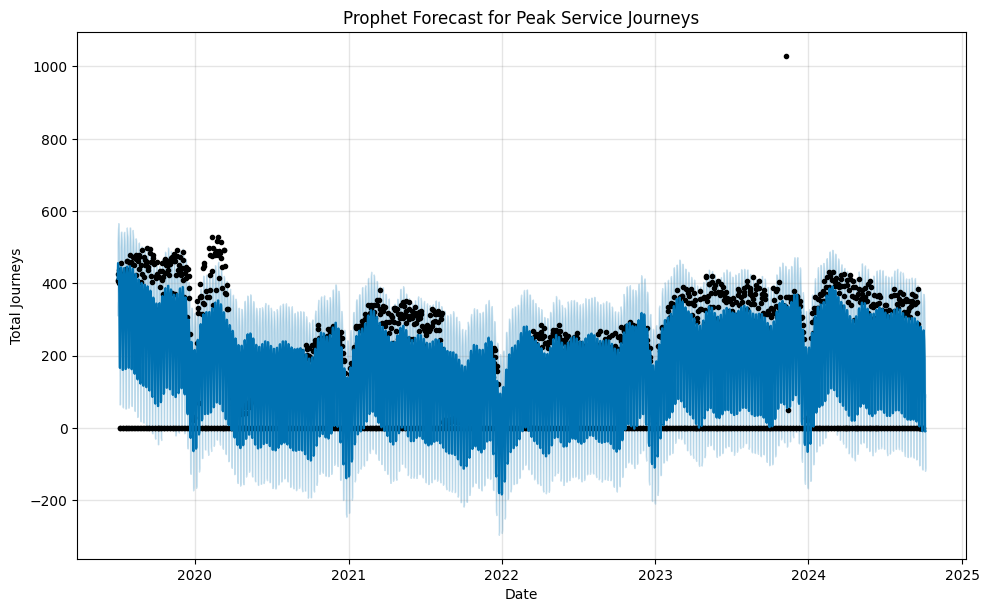

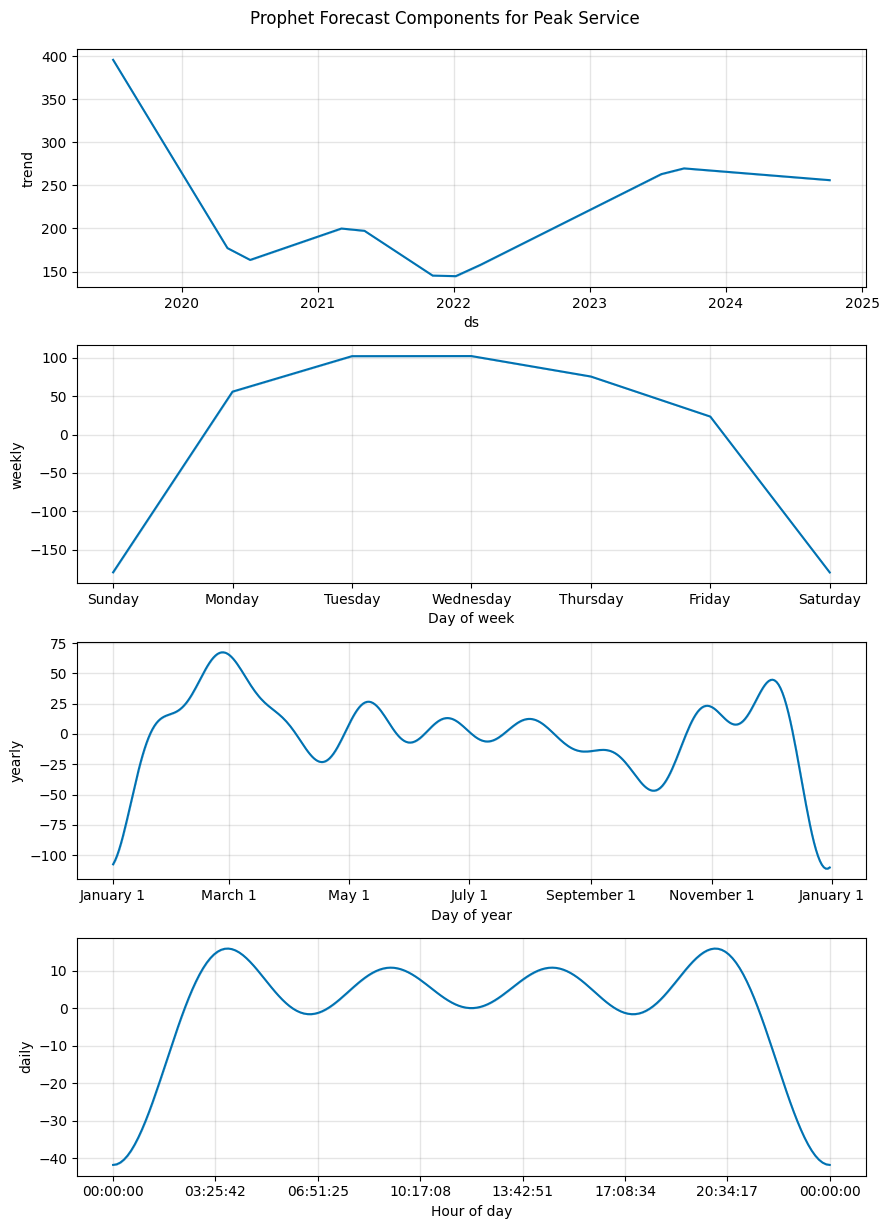

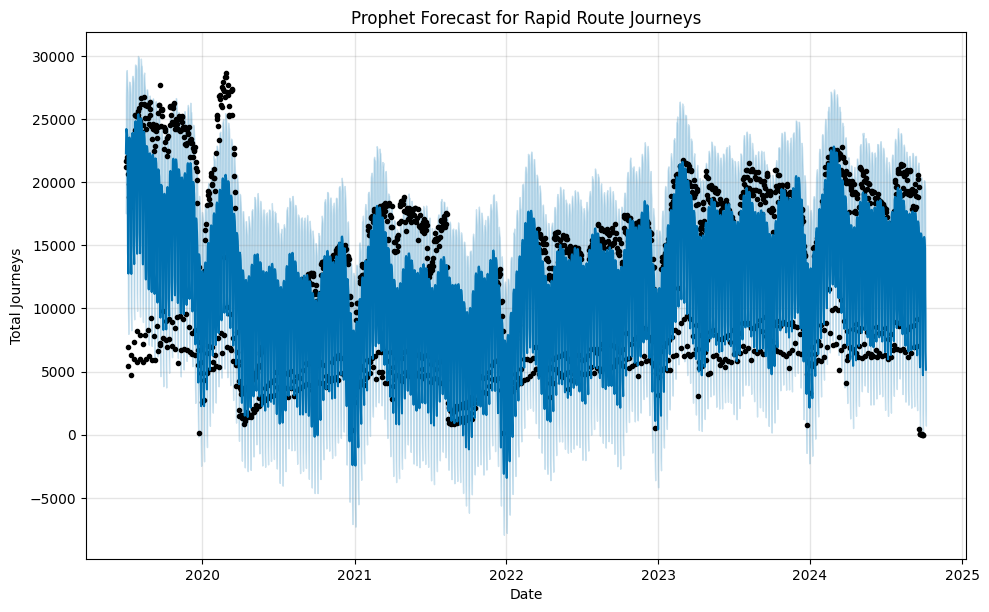

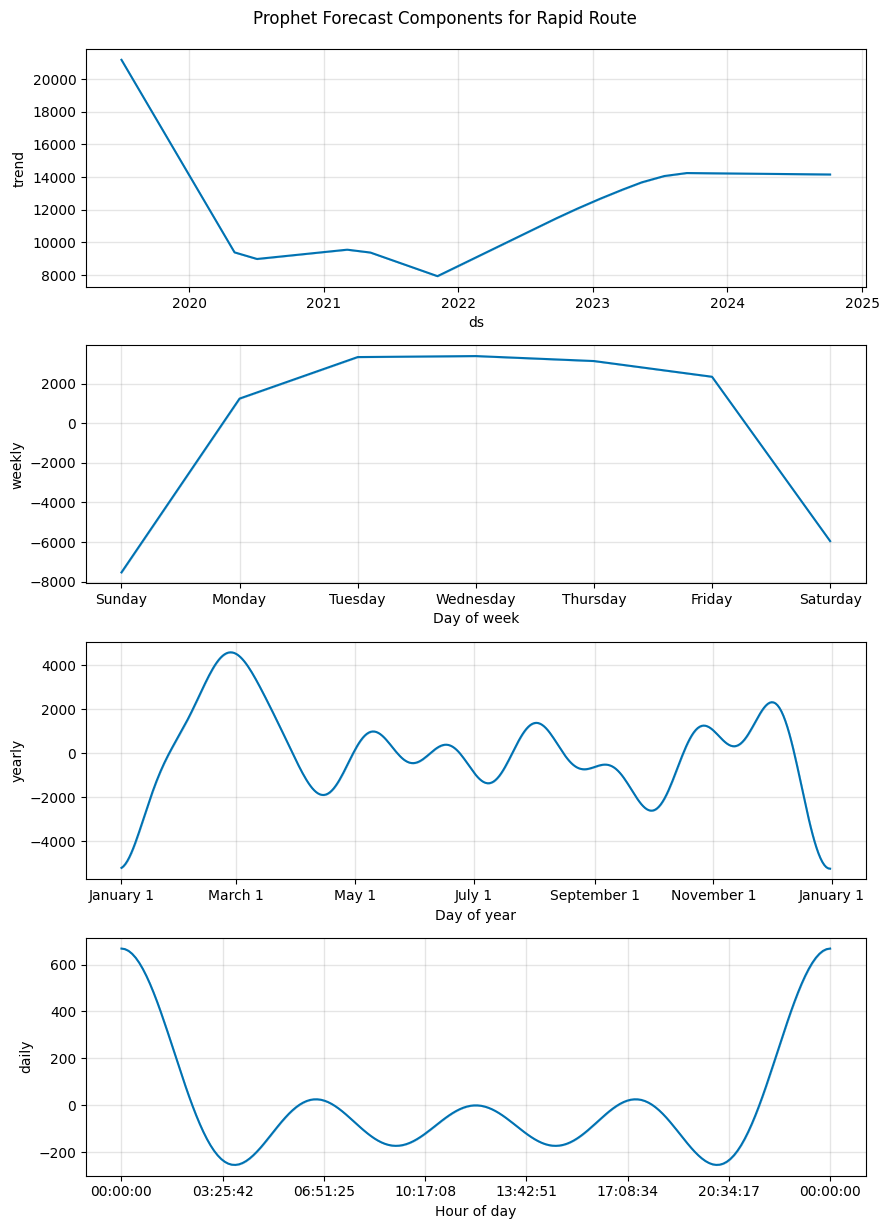

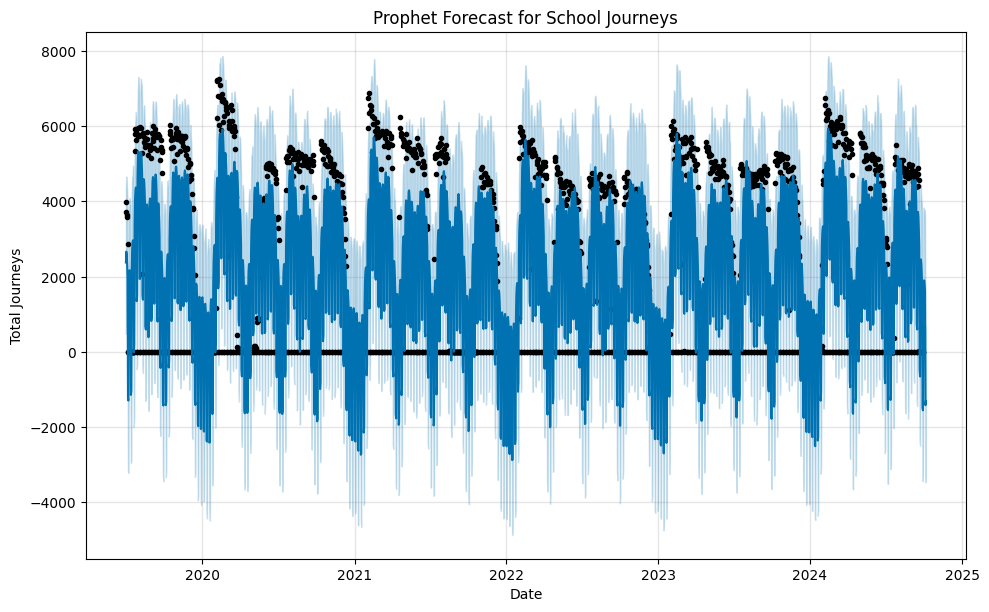

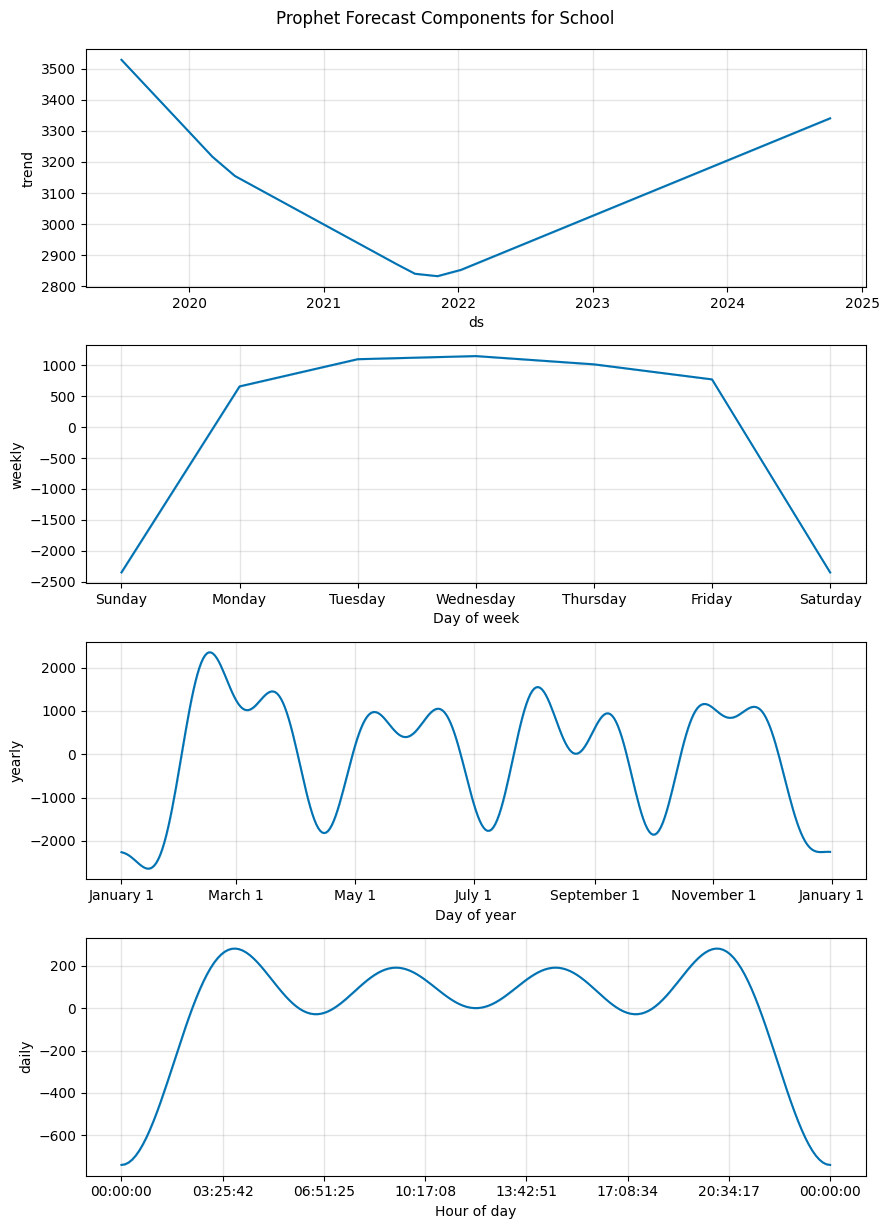

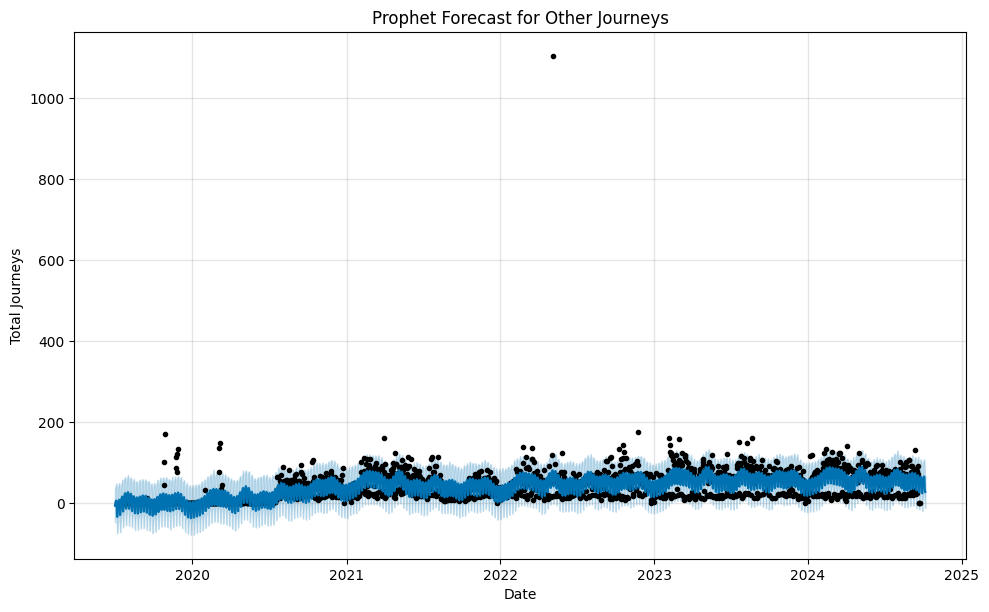

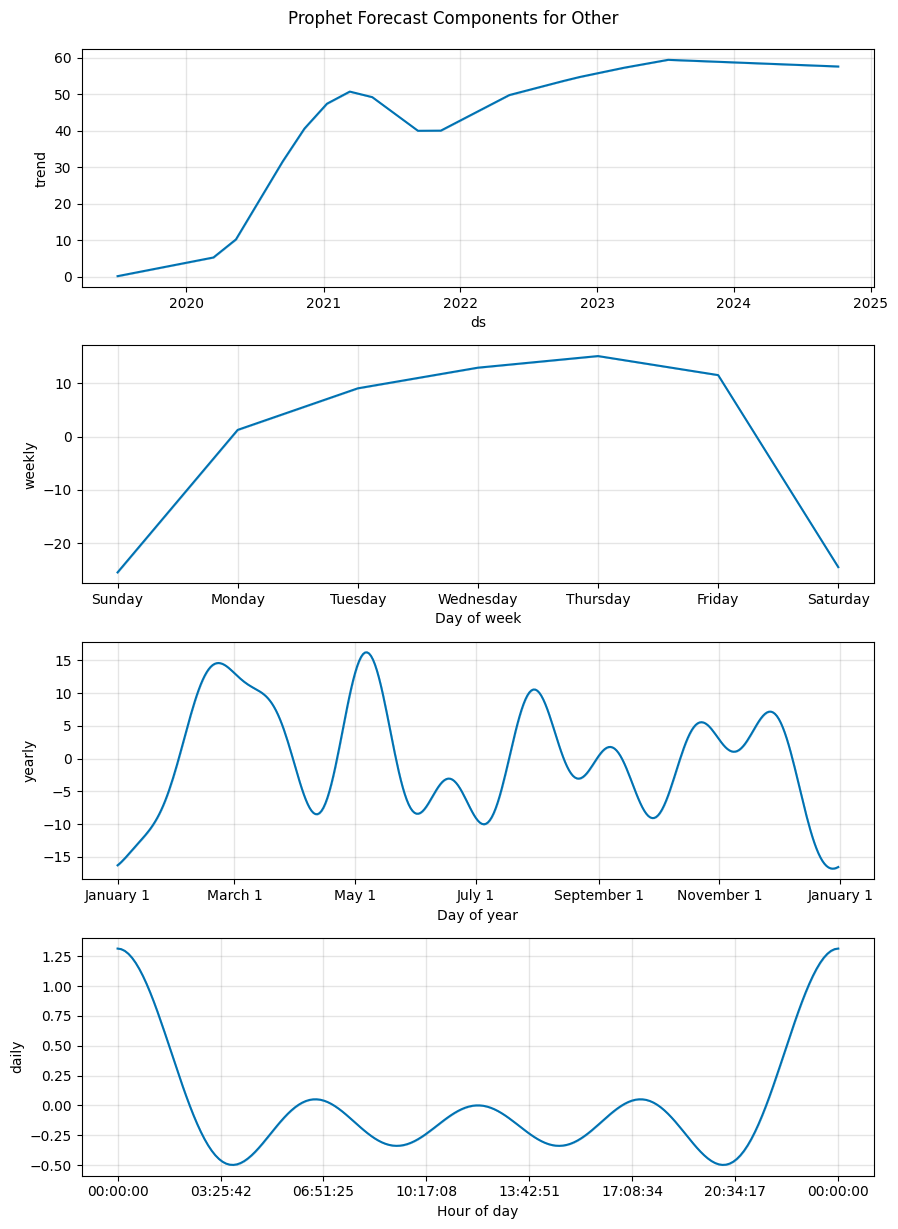

In [ ]:
import matplotlib.pyplot as plt

numerical_journey_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

for route_type in numerical_journey_cols:
    model = models[route_type]
    forecast = forecasts[route_type]

    # Plot the overall forecast
    fig1 = model.plot(forecast)
    plt.title(f'Prophet Forecast for {route_type} Journeys')
    plt.xlabel('Date')
    plt.ylabel('Total Journeys')
    plt.show()

    # Plot the forecast components
    fig2 = model.plot_components(forecast)
    plt.suptitle(f'Prophet Forecast Components for {route_type}', y=1.02)
    plt.show()


INSIGHTS:

Insight 1:
People travel darastically increase from 2022 to 2023 with a 25.05% increase compared to the previous year 2021 to 2022 wich aready had a growth of 16.39% later in 2025 to 2023 to 2024 there was and drastic reduce in transportation in general of 23% which lead it back closer to Mean.

Insight 2:
observation: we can see people prefer rapid routs folled by local routes and tend to avoid peak service.

Insight 3: the 2020 decrease is due to the spread of covid 19 pandamic and because of imediatelockdown restrictions. The 2021 decrease is due to the second way lockdown that was caused by the reopening of colleges, schools and work stations.

observation:
see a decrease of 81.55% in transport from 2020 march to april then a another decrease of 47.73% in 2021 july to augest followed by an another drastic downwasd trend of 73.15% on 2021 augest to september.


Insight 4: we can observe the travell is highest on weekdays from tuesday till wednesday with an travel range of 27% to 29 % above average . weekends tend to have lowest travel ranges of 53% to 67% below average .

Insight 5: we see a clear trend in increased use of school route on the month of May which maybe due to exam season.

#WHY PROPHET ?

Prophet is particularly well-suited for this dataset because public transport passenger journeys often exhibit strong, predictable patterns:

##Multiple Seasonalities:
Public transport data typically shows clear daily, weekly (weekday/weekend), and yearly (holiday periods, school terms) patterns. Prophet is designed to automatically detect and model these multiple seasonalities, providing more accurate forecasts than traditional methods.
##Robustness to Outliers and Missing Data:
Our dataset, especially with the observed drastic drops during events like the COVID-19 pandemic, likely contains significant outliers and periods of anomalous data. Prophet is built to be robust to such irregularities, making it less sensitive to these extreme values than other forecasting models. It can also handle missing historical data without requiring imputation.

##Handling Trend Changes:
The pandemic introduced sudden and significant shifts in public transport usage. Prophet can identify and model these abrupt changes in trend (referred to as 'change points'), allowing it to adapt to evolving conditions rather than assuming a constant underlying trend.

##Interpretability:
Prophet decomposes the forecast into interpretable components: trend, seasonality (daily, weekly, yearly), and holidays. This allows for a clearer understanding of the factors driving passenger journey numbers, which is valuable for analysis and decision-making.

In summary, Prophet's ability to model complex seasonal patterns, handle outliers and missing data, and adapt to trend changes makes it an excellent choice for forecasting and analyzing this type of public transport time-series data.

## Calculate Mean Absolute Percentage Error (MAPE)



In [81]:
mape_results = {}
numerical_journey_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

for route_type in numerical_journey_cols:
    # Retrieve actual historical data
    actual_df = dfs_for_prophet[route_type]

    # Retrieve forecasted data
    forecast_df = forecasts[route_type]

    # Merge actual and forecasted data on 'ds' (Date)
    # We only care about the dates present in the actual data for calculating MAPE
    merged_df = pd.merge(actual_df, forecast_df[['ds', 'yhat']], on='ds', how='inner')

    # Filter out rows where actual 'y' is zero to avoid division by zero in MAPE calculation
    # This also helps in avoiding infinite MAPE values for predictions on zero actuals
    merged_df = merged_df[merged_df['y'] != 0]

    if not merged_df.empty:
        # Calculate Absolute Percentage Error
        merged_df['APE'] = abs((merged_df['y'] - merged_df['yhat']) / merged_df['y']) * 100

        # Calculate MAPE
        mape = merged_df['APE'].mean()
        mape_results[route_type] = mape
    else:
        mape_results[route_type] = float('nan') # Or handle as appropriate if no non-zero actuals

print("MAPE Results for Each Route Type:")
for route_type, mape_value in mape_results.items():
    print(f"{route_type}: {mape_value:.2f}%")

MAPE Results for Each Route Type:
Local Route: 526.43%
Light Rail: 46.05%
Peak Service: 80.15%
Rapid Route: 417.84%
School: 1236.04%
Other: 145.58%


/tmp/ipython-input-1941235558.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAPE (%)', y='Route Type', data=mape_df, palette='viridis')


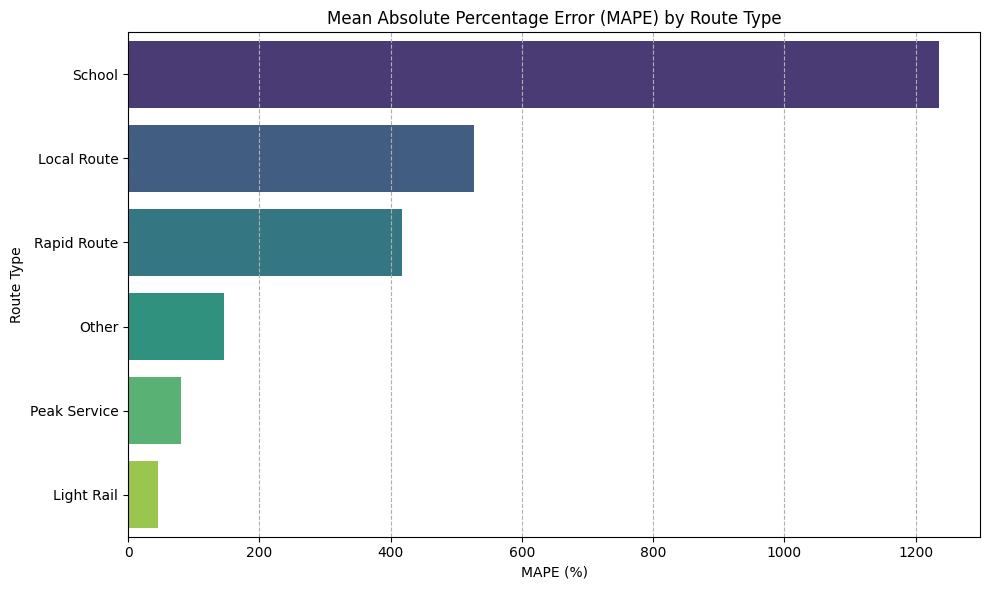

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert MAPE results dictionary to a Pandas DataFrame for easier plotting
mape_df = pd.DataFrame(mape_results.items(), columns=['Route Type', 'MAPE (%)'])

# Sort the DataFrame by MAPE for better visualization
mape_df = mape_df.sort_values(by='MAPE (%)', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='MAPE (%)', y='Route Type', data=mape_df, palette='viridis')
plt.title('Mean Absolute Percentage Error (MAPE) by Route Type')
plt.xlabel('MAPE (%)')
plt.ylabel('Route Type')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

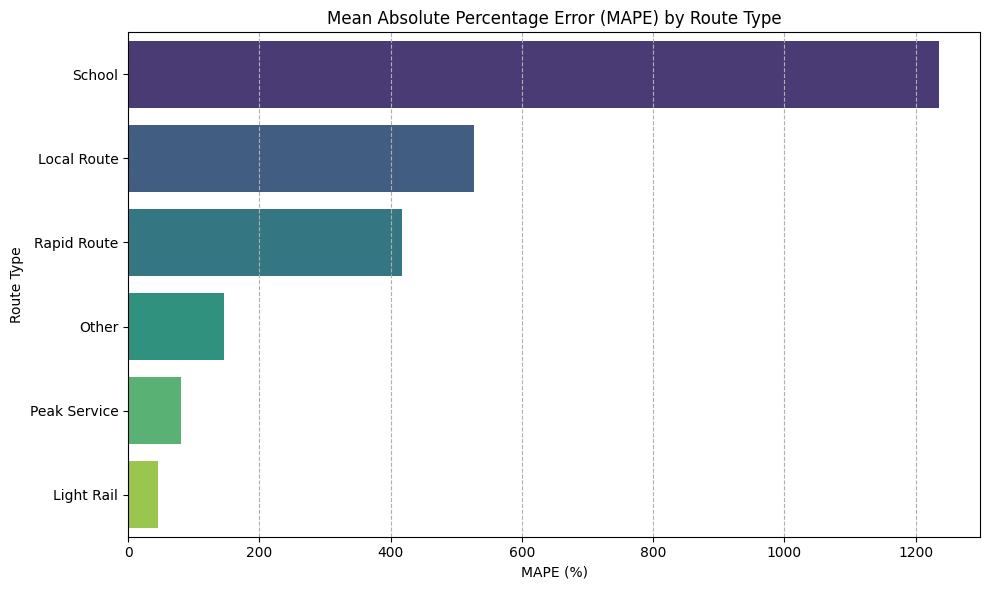

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert MAPE results dictionary to a Pandas DataFrame for easier plotting
mape_df = pd.DataFrame(mape_results.items(), columns=['Route Type', 'MAPE (%)'])

# Sort the DataFrame by MAPE for better visualization
mape_df = mape_df.sort_values(by='MAPE (%)', ascending=False)

# Create the bar chart, explicitly setting hue and legend to avoid FutureWaring
plt.figure(figsize=(10, 6))
sns.barplot(x='MAPE (%)', y='Route Type', hue='Route Type', data=mape_df, palette='viridis', legend=False)
plt.title('Mean Absolute Percentage Error (MAPE) by Route Type')
plt.xlabel('MAPE (%)')
plt.ylabel('Route Type')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## Summary of Prophet Model Performance (MAPE) by Route Type

Based on the Mean Absolute Percentage Error (MAPE) visualization, we can draw the following conclusions regarding the Prophet model's performance for each public transport route type:

*   **Highest MAPE (Worst Performance):** The 'School' route type exhibits the highest MAPE at **1236.04%**, followed by 'Local Route' at **526.43%**, and 'Rapid Route' at **417.84%**. These very high MAPE values suggest that the Prophet model struggles significantly to accurately forecast passenger journeys for these categories. This could be due to extreme variability, unique irregular patterns (e.g., school holidays, special events for local/rapid routes) that are not adequately captured by the seasonalities or trend changes, or perhaps a higher frequency of zero-value days for 'School' routes, which can inflate MAPE.

*   **Moderate MAPE:** The 'Other' category shows a moderate MAPE of **145.58%** and 'Peak Service' has a MAPE of **80.15%**. While better than the routes with the highest errors, these still indicate substantial prediction errors, suggesting that these categories also have complex patterns or less predictable fluctuations.

*   **Lowest MAPE (Best Performance):** The 'Light Rail' route type has the lowest MAPE at **46.05%**. This indicates that the Prophet model performs relatively better for Light Rail, suggesting its passenger journey patterns might be more stable and predictable with its defined seasonalities and trends compared to other route types. While 46.05% is still a considerable error, it is significantly lower than the other categories.


This high error rate may be dude to the change heavy seasonality that was caused by covid 19